# Geração de Imagens do domínio Tempo-Frequência

Imagens do domínio tempo-frequência são mais representativas por permitirem simultaneamente a análise do tempo, da frequência e da amplitude (SI et al. 2021). 

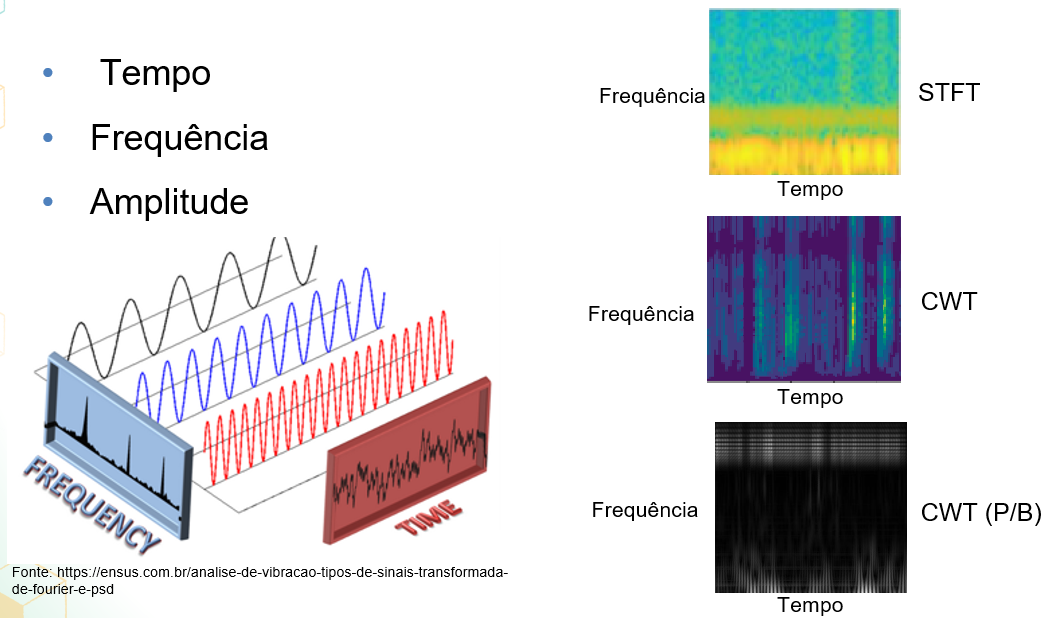

As imagens geradas serão utilizadas para o treinamento dos modelos de classificação de falhas.

## Importação de bibliotecas

In [1]:
import glob
import scipy.io
import numpy as np
import pandas as pd
from matplotlib import image
import matplotlib.pyplot as plt
import shutil
import os

## Geração das Imagens

O processo de geração de imagens pode ser realizado por duas técnicas: STFT e CWT. Os sinais são divididos em sub-amostras de 1024 pontos. A cada imagem gerada, um incremento de 256 pontos é realizado para a geração da próxima imagem, de forma que obtém-se uma varredura completa do sinal com sobreposição. A figura abaixo ilustra o processo de geração de imagens.

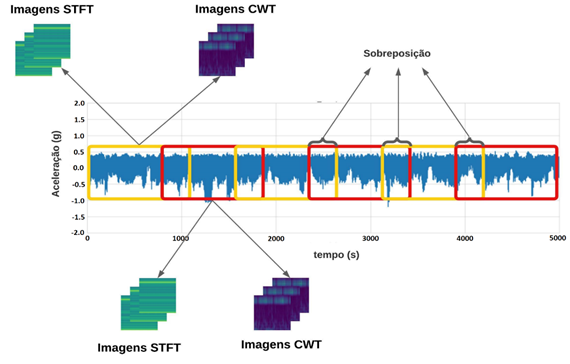

Cada quadro amarelo e vermelho corresponde a uma janela de 1024 pontos de amostra, e cada sobreposição possui 256 pontos.

## Geração de imagens STFT

Esta técnica é baseada no pressuposto que o sinal tende a ser estacionário durante um curto período de tempo (BOUCHIKHI et al. 2011). A geração deste tipo de imagem é efetuada em duas etapas: primeiro o sinal é dividido em segmentos de tempo, e depois o espectro de cada segmento é calculado através da transformada Fourier (BOUCHIKHI et al. 2011).  A figura abaixo ilustra um espectrograma gerado pelo método citado.

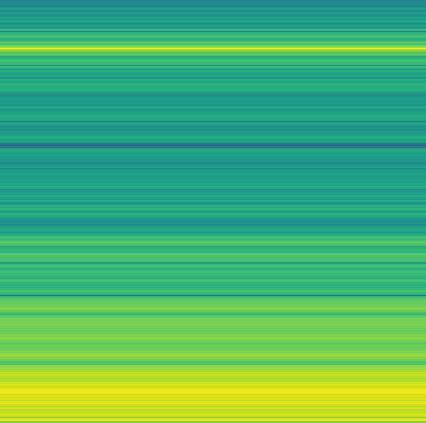

O exemplo ilustrado é utilizando a base de dados Mafaulda. Um pré-processamento deve ser realizado anteriormente para dividir
os arquivos de acordo com as suas respectivas velocidades. É importante que a estrutura de diretórios para armazenamento das 
imagens seja criada anteriormente, seguindo o padrão adequado:

/Base de imagens/Velocidades/Velocidade_X/imagens/Classes



In [7]:

pasta_raiz = 'cole aqui o caminho da pasta que contém os arquivos .csv dos dados'
lista_classes = ['Desal_H','Desal_V', 'Desb', 'Norm', 'Ovhbf', 'Ovhcf', 'Ovhorf', 'Unhbf', 'Unhcf', 'Unhorf'] # Lista de classes do dataset Mafaulda


i = 737 # Menor velocidade disponível no dataset

while i <= 3617: # Maior velocidade disponível no dataset

    Amostras_por_Velocidade = glob.glob(pasta_raiz + '\{}'.format(i) + 'rpm/*.csv')
    
    
    j = 0
    while j <= len(Amostras_por_Velocidade)-1:
        classe = Amostras_por_Velocidade[j]
        corte = classe.rfind("\\")
        classe = classe[corte+1:-4]
        
        atual = Amostras_por_Velocidade[j]
        df = pd.read_csv(atual, names = ['vel','acx', 'acy','acz', '2acx', '2acy', '2acz', 'sound']) # Atributos disponíveis no dataset Mafaulda
        df.insert(loc = 8, column = 'Estado')
        df = df[['acy']] # seleção do sinal de vibração utilizado, para gerar imagens através do som, substituir pela coluna sound.
        
        k= 0

        inicio = k*256
        fim = 1024
        divisor = 256

        X_espec = []
        y_falhas =[]
        
        while fim <= len(df):
            if inicio == 0: #primeira iteração
        
                acy = df['acy'].iloc[int(inicio): int(fim)].tolist()
       
                k= k+ 1     
              
                inicio = inicio + 256 
                fim = fim + 256
    
            else:
                acy = df['acy'].iloc[int(inicio):int(fim)].tolist()
  
                k= k+ 1
    
                inicio = inicio + 256
                fim = fim + 256
        
        
            NFFT = 2 ** (int(np.log2(len(acy))) + 1)
            figura = plt.figure(figsize=(7.65,7.79))
            figura = plt.specgram(acy,Fs=50000,NFFT = 1024 , noverlap=0) #Fs: Frequency sample de 50kHz, NFFT: 1024 pontos para transformada Fourier
            figura = plt.axis('off')
            
            m = 0
            while m <= len(lista_classes)-1:
                
                if (Amostras_por_Velocidade[j].find(lista_classes[m])) != -1:
                     plt.savefig('caminho para salvar as imagens'.format(i) + '\\images' + '\\'+ lista_classes[m] + '\\' + classe + '_' + str(k) + '.jpg',
                        bbox_inches='tight', pad_inches = 0)

                m+=1
         
        plt.close('all') #Limpar memória RAM
        
        j += 1
        
    plt.close('all') #Limpar memória RAM      
    i += 120

C:\Users\ksilva\.conda\envs\env2\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=1024).
C:\Users\ksilva\.conda\envs\env2\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


# Geração de imagens CWT

Nesta técnica o sinal é dividido em versões espaçadas e escalonadas de uma determinada wavelet mãe (BOUCHIKHI et al. 2011). Essas versões são unidas e compõe a imagem. A figura abaixo ilustra um espectrograma CWT.

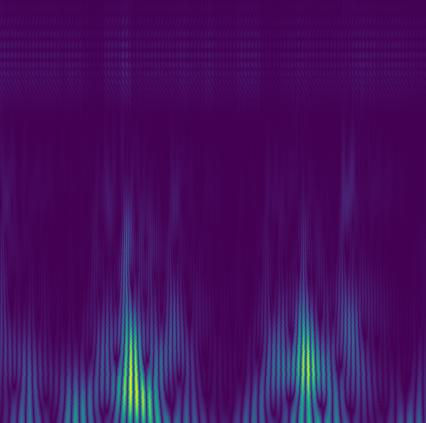



O exemplo ilustrado é utilizando a base de dados Mafaulda. Um pré-processamento deve ser realizado anteriormente para dividir os arquivos de acordo com as suas respectivas velocidades. É importante que a estrutura de diretórios para armazenamento das imagens seja criada anteriormente, seguindo o padrão adequado:

/Base de imagens/Velocidades/Velocidade_X/imagens/Classes

In [ ]:

pasta_raiz = 'cole aqui o caminho da pasta que contém os arquivos .csv dos dados'
lista_classes = ['Desal_H','Desal_V', 'Desb', 'Norm', 'Ovhbf', 'Ovhcf', 'Ovhorf', 'Unhbf', 'Unhcf', 'Unhorf'] # Lista de classes do dataset Mafaulda


i = 737 # Menor velocidade disponível no dataset

while i <= 3617: # Maior velocidade disponível no dataset

    Amostras_por_Velocidade = glob.glob(pasta_raiz + '\{}'.format(i) + 'rpm/*.csv')
    
    
    j = 0
    while j <= len(Amostras_por_Velocidade)-1:
        classe = Amostras_por_Velocidade[j]
        corte = classe.rfind("\\")
        classe = classe[corte+1:-4]
        
        atual = Amostras_por_Velocidade[j]
        df = pd.read_csv(atual, names = ['vel','acx', 'acy','acz', '2acx', '2acy', '2acz', 'sound']) # Atributos disponíveis no dataset Mafaulda
        df.insert(loc = 8, column = 'Estado')
        df = df[['acy']] # seleção do sinal de vibração utilizado, para gerar imagens através do som, substituir pela coluna sound.
        
        k= 0

        inicio = k*256
        fim = 1024
        divisor = 256

        X_espec = []
        y_falhas =[]
        
        while fim <= len(df):
            if inicio == 0: #primeira iteração
        
                acy = df['acy'].iloc[int(inicio): int(fim)].tolist()
       
                k= k+ 1     
              
                inicio = inicio + 256 
                fim = fim + 256
    
            else:
                acy = df['acy'].iloc[int(inicio):int(fim)].tolist()
  
                k= k+ 1
    
                inicio = inicio + 256
                fim = fim + 256
            
            scales = np.logspace(0, np.log10(30), num=300)
            cwtmatr, freqs = pywt.cwt(sound, scales, 'morl')
        
            figura = plt.figure(figsize=(7.65, 7.69))
            figura = plt.imshow(np.abs(cwtmatr), aspect='auto', cmap='viridis', extent=[0, 1, freqs[-1], freqs[0]])
            figura = plt.axis('off')
                        
            m = 0
            while m <= len(lista_classes)-1:
                
                if (Amostras_por_Velocidade[j].find(lista_classes[m])) != -1:
                     plt.savefig('caminho para salvar as imagens'.format(i) + '\\images' + '\\'+ lista_classes[m] + '\\' + classe + '_' + str(k) + '.jpg',
                        bbox_inches='tight', pad_inches = 0)

                m+=1
         
        plt.close('all') #Limpar memória RAM
        
        j += 1
        
    plt.close('all') #Limpar memória RAM      
    i += 120